In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [60]:
x = '0.         0.10237598 0.20356107 0.31060314 0.41278911 0.51641417 0.6209681  0.72460604 0.82716513 0.9313271  1.03598118 1.13713288 1.24188185 1.3430748  1.44661593 1.54948592 1.65456796 1.7594111' 
x = np.fromstring(x, sep=' ')


In [61]:
x = x.astype(np.float)
y = [34.68208092, 36.70520231, 37.57225434, 39.01734104, 40.46242775, 41.32947977,
 42.77456647, 44.79768786, 46.53179191, 47.68786127, 51.44508671, 52.60115607,
 54.04624277, 52.31213873, 53.75722543, 55.20231214, 57.51445087, 59.8265896 ]
y = np.array(y)

In [77]:
z = np.polyfit(x=x, y=y, deg=3)
poly3 = np.poly1d(z)
xnew = np.linspace(0, max(x), num=50, endpoint=True)
ynew = poly3(xnew)

firstOrderCutoff = secondOrderCutoff = cutoff = len(x)
dydx = np.gradient(ynew,xnew)
if (dydx==0).any():
    firstOrderCutoff = np.where(dydx==0)[0][-1]

d2ydx2 = np.gradient(dydx, xnew)
if (d2ydx2 == 0).any():
    secondOrderCutoff = np.where(d2ydx2 == 0)[0][0]
cutoff = min(firstOrderCutoff,secondOrderCutoff)

In [85]:
np.where(np.diff(np.sign(d2ydx2)))

(array([], dtype=int64),)

In [79]:
print(firstOrderCutoff,secondOrderCutoff)

18 18


In [87]:
print(d2ydx2)
print(np.sign(d2ydx2))
print(np.diff(np.sign(d2ydx2)))

[ 3.33245607  4.90999379  6.31015086  5.95538957  5.60062829  5.245867
  4.89110572  4.53634443  4.18158315  3.82682186  3.47206058  3.11729929
  2.76253801  2.40777672  2.05301543  1.69825415  1.34349286  0.98873158
  0.63397029  0.27920901 -0.07555228 -0.43031356 -0.78507485 -1.13983613
 -1.49459742 -1.84935871 -2.20411999 -2.55888128 -2.91364256 -3.26840385
 -3.62316513 -3.97792642 -4.3326877  -4.68744899 -5.04221027 -5.39697156
 -5.75173285 -6.10649413 -6.46125542 -6.8160167  -7.17077799 -7.52553927
 -7.88030056 -8.23506184 -8.58982313 -8.94458441 -9.2993457  -9.65410698
 -7.41796088 -5.00443414]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

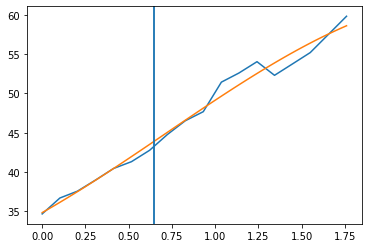

In [80]:
plt.plot(x,y)
plt.plot(xnew,ynew)
# plt.plot(x, f2(x))
plt.axvline(x=xnew[firstOrderCutoff])
plt.axvline(x=xnew[secondOrderCutoff])


In [48]:
poly3

poly1d([-1.6466971 ,  3.50983672, 12.43122793, 34.84788114])

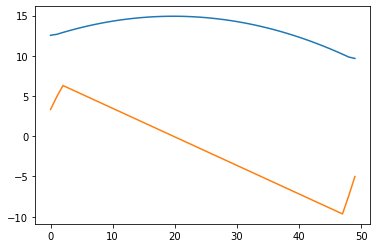

In [49]:
plt.plot(dydx)
plt.plot(d2ydx2)

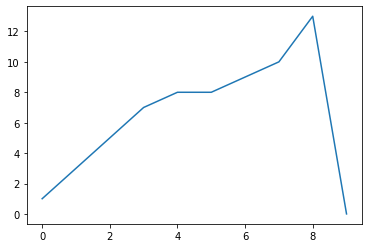

In [149]:
y = np.array([1,3,5,7,8,8,9,10,13,0])
x = np.array(range(len(y)))
plt.plot(x,y)

In [150]:
z = np.polyfit(x=x, y=y, deg=3)
poly3 = np.poly1d(z)
xnew = np.linspace(0, max(x), num=50, endpoint=True)
ynew = poly3(xnew)

firstOrderCutoff = secondOrderCutoff = cutoff = -1
dydx = np.gradient(ynew,xnew)
if (dydx==0).any():
    firstOrderCutoff = np.where(dydx==0)[0][-1]

d2ydx2 = np.gradient(dydx, xnew)
secondOrderCutoff = np.where(np.diff(np.sign(d2ydx2))>0)[0]
# if (d2ydx2 == 0).any():
#     secondOrderCutoff = np.where(d2ydx2 == 0)[0][0]
cutoff = min(firstOrderCutoff,secondOrderCutoff)

<ipython-input-150-539e52c0ef21>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  cutoff = min(firstOrderCutoff,secondOrderCutoff)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

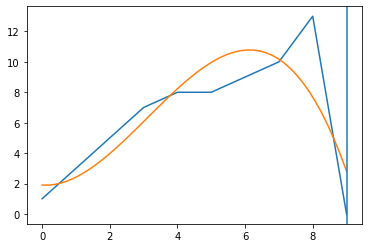

In [151]:
plt.plot(x,y)
plt.plot(xnew,ynew)
plt.axvline(x=xnew[firstOrderCutoff])
plt.axvline(x=xnew[secondOrderCutoff],color='red')

In [152]:
np.where(np.diff(np.sign(d2ydx2))>0)

(array([], dtype=int64),)